# This notebook analyzes UFC data 

In [5]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 100

pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ufc_data = pd.read_csv("ufc_data.csv")

In [7]:
ufc_data.head()

,Fighter A,Fighter B,Result,Weightclass,Rounds,Venue,Date,Location,Billing,Event Name,Referee,Description,Method,Finish,Odds A,Title A,Weight A,Age A,Height A,Reach A,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,UFC win A,UFC loss A,UFC draws A,Nationality A,Nick A,Odds cat A,Odds B,Title B,Weight B,Age B,Height B,Reach B,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,UFC win B,UFC loss B,UFC draws B,Nationality B,Nick B,Odds cat B
0,Marcin Tybura,Tai Tuivasa,win,265.0,5,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Event,UFC Fight Night: Tuivasa vs. Tybura,Herb Dean,Rear Naked Choke,Submission,1,-105,NaN,247.0,38,191.0,198.0,9,5,6,0,9,3,0,11,7,0,Poland,Tybur,Near Even,-115,NaN,265.5,31,188.0,191.0,13,3,0,2,1,1,0,8,6,0,Australia,Bam Bam,Near Even
1,Bryan Battle,Ange Loosa,NC,170.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Co-Main,UFC Fight Night: Tuivasa vs. Tybura,Mike Beltran,Accidental Eye Poke,No Contest,0,-180,NaN,170.0,29,185.0,196.0,3,0,5,1,2,1,0,5,1,0,United States,The Butcher,Slight Favorite,150,NaN,171.0,29,178.0,188.0,5,0,1,0,4,3,0,2,1,0,"Congo, The Democratic Republic of the",The Last Ninja,Slight Underdog
2,Ovince St. Preux,Kennedy Nzechukwu,win,205.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Mark Smith,Split,Decision,0,500,NaN,206.0,40,191.0,203.0,12,5,8,3,6,9,0,14,12,0,United States,OSP,Heavy Underdog,-700,NaN,205.0,31,196.0,211.0,8,2,1,1,3,1,0,6,4,0,United States,American Savage,Huge Favorite
3,Christian Rodriguez,Isaac Dulgarian,win,145.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Chris Tognoni,Split,Decision,0,165,NaN,145.0,26,170.0,180.0,3,0,4,0,3,1,0,3,1,0,United States,CeeRod,Slight Underdog,-200,NaN,145.5,27,170.0,180.0,4,0,2,0,0,0,0,1,0,0,United States,The MidWest Choppa,Moderate Favorite
4,Macy Chiasson,Pannie Kianzad,win,135.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Mark Smith,Rear Naked Choke,Submission,1,-230,NaN,135.5,32,180.0,183.0,2,1,2,1,4,1,0,6,3,0,United States,NaN,Moderate Favorite,190,NaN,136.0,32,170.0,168.0,3,1,0,2,13,4,0,5,4,0,Sweden,Banzai,Slight Underdog


In [8]:
ufc_data.describe(include="all")

,Fighter A,Fighter B,Result,Weightclass,Rounds,Venue,Date,Location,Billing,Event Name,Referee,Description,Method,Finish,Odds A,Title A,Weight A,Age A,Height A,Reach A,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,UFC win A,UFC loss A,UFC draws A,Nationality A,Nick A,Odds cat A,Odds B,Title B,Weight B,Age B,Height B,Reach B,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,UFC win B,UFC loss B,UFC draws B,Nationality B,Nick B,Odds cat B
count,7294,7294,7294,7294.000000,7294.000000,7294,7294,7294,7294,7294,7192,7265,7294,7294.000000,7294.000000,328,7294.000000,7294.000000,7294.000000,7294.00000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294,5737,7294,7294.000000,328,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294.000000,7294,5673,7294
unique,1632,2179,3,NaN,NaN,248,644,175,5,649,209,408,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,1067,10,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,1338,10
top,Jim Miller,Jeremy Stephens,win,NaN,NaN,UFC APEX,2016-11-19,"Las Vegas, Nevada, United States",Prelim,UFC Fight Night: Aspinall vs. Tybura,Herb Dean,Unanimous,Decision,NaN,NaN,Champion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,Cowboy,Moderate Favorite,NaN,Challenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,The Spartan,Moderate Underdog
freq,27,19,7157,NaN,NaN,764,25,2449,3957,15,1092,2617,3418,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3844,35,2010,NaN,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4045,35,1752
mean,NaN,NaN,NaN,168.448862,3.180971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.877296,-131.491363,NaN,167.434234,29.384974,178.739649,183.69737,5.839183,1.007266,4.399781,0.957774,3.757335,1.725802,0.157938,3.574993,1.867562,0.040444,NaN,NaN,NaN,71.211681,NaN,167.406005,30.148204,178.485096,183.227432,5.779819,1.179737,4.592953,1.109268,3.808061,1.882232,0.197834,3.383055,2.004387,0.041678,NaN,NaN,NaN
std,NaN,NaN,NaN,37.936675,0.573791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.032661,267.531927,NaN,34.719026,4.016096,9.037656,10.94614,4.257036,1.341294,4.177507,1.422093,3.040124,1.905688,0.473058,3.789550,2.151536,0.205194,NaN,NaN,NaN,239.588910,NaN,34.700926,4.172918,8.853481,10.427629,4.398471,1.460075,4.364581,1.538211,3.184816,2.038093,0.587768,3.928920,2.298208,0.214429,NaN,NaN,NaN
min,NaN,NaN,NaN,115.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-2200.000000,NaN,113.000000,18.000000,152.000000,149.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-1400.000000,NaN,112.000000,18.000000,152.000000,149.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,145.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-270.000000,NaN,145.000000,27.000000,173.000000,178.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,-137.500000,NaN,145.000000,27.000000,173.000000,177.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,155.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-155.000000,NaN,156.000000,29.000000,178.000000,183.00000,5.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,2.000000,1.000000,0.000000,NaN,NaN,NaN,130.000000,NaN,156.000000,30.000000,178.000000,183.000000,5.000000,1.000000,4.000000,1.000000,3.000000,1.000000,0.000000,2.000000,1.000000,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,185.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,115.000000,NaN,185.000000,32.000000,185.000000,191.00000,8.000000,1.000000,6.000000,1.000000,5.000000,3.000000,0.000000,5.000000,3.000000,0.000000,Na

In [9]:
ufc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7294 entries, 0 to 7293
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fighter A      7294 non-null   object 
 1   Fighter B      7294 non-null   object 
 2   Result         7294 non-null   object 
 3   Weightclass    7294 non-null   float64
 4   Rounds         7294 non-null   int64  
 5   Venue          7294 non-null   object 
 6   Date           7294 non-null   object 
 7   Location       7294 non-null   object 
 8   Billing        7294 non-null   object 
 9   Event Name     7294 non-null   object 
 10  Referee        7192 non-null   object 
 11  Description    7265 non-null   object 
 12  Method         7294 non-null   object 
 13  Finish         7294 non-null   int64  
 14  Odds A         7294 non-null   int64  
 15  Title A        328 non-null    object 
 16  Weight A       7294 non-null   float64
 17  Age A          7294 non-null   int64  
 18  Height A

## Research Questions

### 1. How do physical attributes affect the result?

#### First we check if height difference plays a significant role in match result.

In [10]:
df_win = ufc_data[ufc_data["Result"] == "win"]
df_win.head()

,Fighter A,Fighter B,Result,Weightclass,Rounds,Venue,Date,Location,Billing,Event Name,Referee,Description,Method,Finish,Odds A,Title A,Weight A,Age A,Height A,Reach A,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,UFC win A,UFC loss A,UFC draws A,Nationality A,Nick A,Odds cat A,Odds B,Title B,Weight B,Age B,Height B,Reach B,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,UFC win B,UFC loss B,UFC draws B,Nationality B,Nick B,Odds cat B
0,Marcin Tybura,Tai Tuivasa,win,265.0,5,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Event,UFC Fight Night: Tuivasa vs. Tybura,Herb Dean,Rear Naked Choke,Submission,1,-105,NaN,247.0,38,191.0,198.0,9,5,6,0,9,3,0,11,7,0,Poland,Tybur,Near Even,-115,NaN,265.5,31,188.0,191.0,13,3,0,2,1,1,0,8,6,0,Australia,Bam Bam,Near Even
2,Ovince St. Preux,Kennedy Nzechukwu,win,205.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Mark Smith,Split,Decision,0,500,NaN,206.0,40,191.0,203.0,12,5,8,3,6,9,0,14,12,0,United States,OSP,Heavy Underdog,-700,NaN,205.0,31,196.0,211.0,8,2,1,1,3,1,0,6,4,0,United States,American Savage,Huge Favorite
3,Christian Rodriguez,Isaac Dulgarian,win,145.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Chris Tognoni,Split,Decision,0,165,NaN,145.0,26,170.0,180.0,3,0,4,0,3,1,0,3,1,0,United States,CeeRod,Slight Underdog,-200,NaN,145.5,27,170.0,180.0,4,0,2,0,0,0,0,1,0,0,United States,The MidWest Choppa,Moderate Favorite
4,Macy Chiasson,Pannie Kianzad,win,135.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Mark Smith,Rear Naked Choke,Submission,1,-230,NaN,135.5,32,180.0,183.0,2,1,2,1,4,1,0,6,3,0,United States,NaN,Moderate Favorite,190,NaN,136.0,32,170.0,168.0,3,1,0,2,13,4,0,5,4,0,Sweden,Banzai,Slight Underdog
5,Gerald Meerschaert,Bryan Barberena,win,185.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Herb Dean,Rear Naked Choke,Submission,2,-250,NaN,185.5,36,185.0,197.0,6,4,27,8,2,5,0,10,9,0,United States,GM3,Moderate Favorite,200,NaN,186.0,34,183.0,183.0,11,2,2,3,5,6,0,9,9,0,United States,Bam Bam,Moderate Underdog


In [11]:
df_win.loc[:, "Height Diff"] = df_win['Height A'] - df_win['Height B']

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\1960808998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win.loc[:, "Height Diff"] = df_win['Height A'] - df_win['Height B']


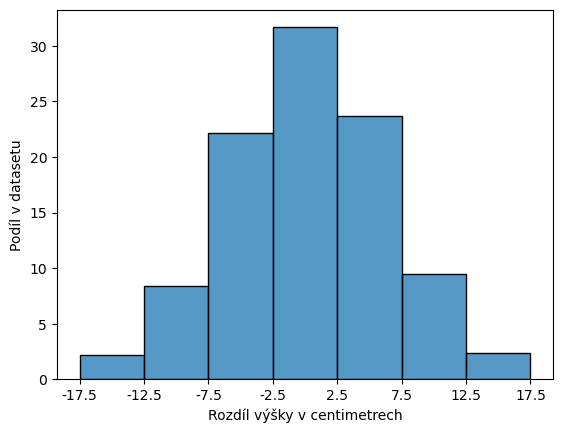

In [12]:
bins = [-17.5, -12.5, -7.5, -2.5, 2.5, 7.5, 12.5, 17.5]
sns.histplot(df_win, x = "Height Diff", bins=bins, stat='percent')
plt.xlabel('Rozdíl výšky v centimetrech')
plt.ylabel('Podíl v datasetu')
plt.xticks(ticks=bins, labels=bins)
plt.show()

In [13]:
counts, _ = np.histogram(df_win['Height Diff'], bins=bins)
print("Counts: ", counts, "Percentage: ", counts/len(df_win['Height Diff']))

Counts:  [ 156  596 1568 2244 1675  673  170] Percentage:  [0.02179684 0.08327512 0.21908621 0.31353919 0.23403661 0.09403381
 0.02375297]


In [14]:
taller = (df_win['Height A'] > df_win['Height B']).sum()
smaller = (df_win['Height A'] < df_win['Height B']).sum()
taller_p = taller / ( taller + smaller)
smaller_p = smaller / ( taller + smaller)
print(taller_p, smaller_p)

0.5179961089494164 0.48200389105058367


The graph above shows the distribution of height difference for the winning fighter. We can see that the graph is quite symetrical with a small skewness to the right, indicating that there is a tiny difference in the chances of fighter winning if he is taller. 

#### Now we check if reach difference plays a significant role in match result.

In [15]:
df_win.loc[:, "Reach Diff"] = df_win['Reach A'] - df_win['Reach B']

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\476300333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win.loc[:, "Reach Diff"] = df_win['Reach A'] - df_win['Reach B']


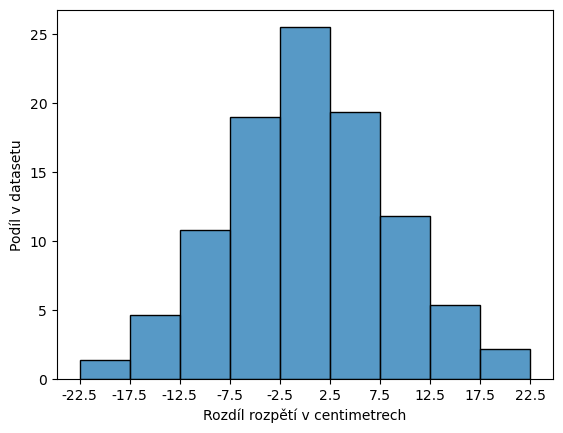

In [16]:
bins = [-22.5, -17.5, -12.5, -7.5, -2.5, 2.5, 7.5, 12.5, 17.5, 22.5]
sns.histplot(df_win, x = "Reach Diff", bins=bins, stat='percent')
plt.xlabel('Rozdíl rozpětí v centimetrech')
plt.ylabel('Podíl v datasetu')
plt.xticks(ticks=bins, labels=bins)
plt.show()

In [17]:
counts, _ = np.histogram(df_win['Reach Diff'], bins=bins)
counts

array([  98,  327,  764, 1346, 1804, 1368,  838,  380,  157], dtype=int64)

In [18]:
longer = (df_win['Reach A'] > df_win['Reach B']).sum()
shorter = (df_win['Reach A'] < df_win['Reach B']).sum()
longer_p = longer / ( longer + shorter)
shorter_p = shorter / ( longer + shorter)
print(longer_p, shorter_p)

0.5268751897965381 0.47312481020346187


This graph looks similar to the one with height, expect we cant see the change until 7.5 centimeters difference.

#### Now we check if age difference affects match result.

In [19]:
df_win.loc[:, "Age Diff"] = df_win['Age A'] - df_win['Age B']

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\4025196989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win.loc[:, "Age Diff"] = df_win['Age A'] - df_win['Age B']


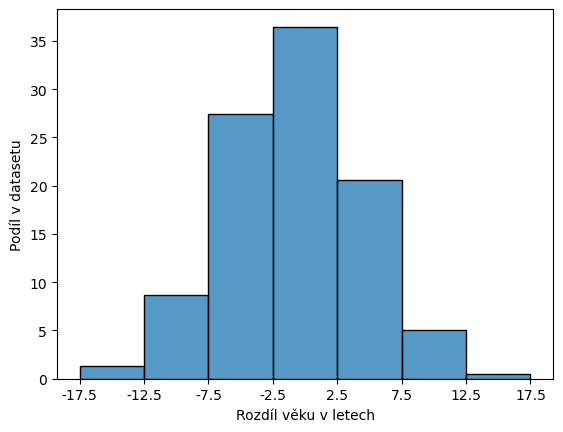

In [20]:
bins = [-17.5, -12.5, -7.5, -2.5, 2.5, 7.5, 12.5, 17.5]
sns.histplot(df_win, x = "Age Diff", bins=bins, stat="percent")
plt.xlabel('Rozdíl věku v letech')
plt.ylabel('Podíl v datasetu')
plt.xticks(ticks=bins, labels=bins)
plt.show()

In [21]:
counts, _ = np.histogram(df_win['Age Diff'], bins=bins)
print("Counts: ", counts, "Percentage: ", counts/len(df_win['Age Diff']))

Counts:  [  94  622 1961 2610 1472  364   34] Percentage:  [0.01313399 0.08690792 0.27399748 0.36467794 0.20567277 0.0508593
 0.00475059]


In [22]:
older = (df_win['Age A'] > df_win['Age B']).sum()
younger = (df_win['Age A'] < df_win['Age B']).sum()
older_p = older / ( older + younger)
younger_p = younger / ( older + younger)
print(older_p, younger_p)

0.434265944645006 0.565734055354994


We can see that there is a big difference in Age when it comes to chances of winning a fight. Younger fighters are more likely to win a fight with a probability of 56.6%.

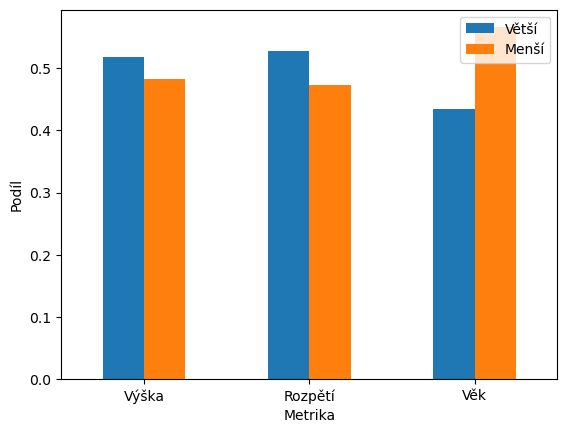

In [23]:
data = {
    "Větší": [taller_p, longer_p, older_p],
    "Menší": [smaller_p, shorter_p, younger_p]
}
chance_df_win = pd.DataFrame(data)
chance_df_win.index = ["Výška", "Rozpětí", "Věk"]
chance_df_win.plot(kind='bar')
plt.xlabel('Metrika')
plt.ylabel('Podíl')
plt.xticks(rotation = 0)
plt.show()

In [24]:
df_win['Height Comparison'] = np.where(df_win['Height A'] > df_win['Height B'], 'Větší', 
                             np.where(df_win['Height A'] < df_win['Height B'], 'Menší', 'Stejné'))

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\3626323207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win['Height Comparison'] = np.where(df_win['Height A'] > df_win['Height B'], 'Větší',


In [25]:
df_win['Reach Comparison'] = np.where(df_win['Reach A'] > df_win['Reach B'], 'Větší', 
                             np.where(df_win['Reach A'] < df_win['Reach B'], 'Menší', 'Stejné'))

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\2793946128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win['Reach Comparison'] = np.where(df_win['Reach A'] > df_win['Reach B'], 'Větší',


In [26]:
df_win['Age Comparison'] = np.where(df_win['Age A'] > df_win['Age B'], 'Větší', 
                             np.where(df_win['Age A'] < df_win['Age B'], 'Menší', 'Stejné'))

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\512459531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win['Age Comparison'] = np.where(df_win['Age A'] > df_win['Age B'], 'Větší',


In [27]:
df_win["Age Comparison"]

0        Větší
2        Větší
3        Menší
4       Stejné
5        Větší
         ...  
7289     Větší
7290     Větší
7291     Větší
7292     Menší
7293     Menší
Name: Age Comparison, Length: 7157, dtype: object

In [28]:
comp_table = df_win.groupby(["Height Comparison", "Reach Comparison", "Age Comparison"])["Result"].count().reset_index()
comp_table.sort_values("Result", ascending=False)

,Height Comparison,Reach Comparison,Age Comparison,Result
24,Větší,Větší,Menší,1341
0,Menší,Menší,Menší,938
2,Menší,Menší,Větší,933
26,Větší,Větší,Větší,809
6,Menší,Větší,Menší,373
18,Větší,Menší,Menší,370
8,Menší,Větší,Větší,280
20,Větší,Menší,Větší,253
15,Stejné,Větší,Menší,228
9,Stejné,Menší,Menší,216


As expected, we can see that the most populated group to win a fight in ufc is a Taller, Longer and Younger fighter.

### 2. How do other characterictics affect the result?

#### Are there some nations that are exceptionaly better than others?

First we need to extract unique values.

In [29]:
nations_list = pd.concat([df_win["Nationality A"], df_win["Nationality B"]], ignore_index=True)
nations_list = nations_list.unique()
nations_list.shape

(102,)

In [30]:
type(nations_list)

numpy.ndarray

Now we calculate the number of wins and losses for each nation. In the A column there are wins, in B column there are losses.

In [31]:
nations_a = df_win.groupby(["Nationality A"])["Result"].count().reset_index()
nations_b = df_win.groupby(["Nationality B"])["Result"].count().reset_index()

Create a DataFrame "nations_record" with nations wins and losses.

In [32]:
# Set 'Nationality A' and 'Nationality B' column as index
nations_a.set_index('Nationality A', inplace=True)
nations_b.set_index('Nationality B', inplace=True)

# Create a DataFrame containing number of wins corresponding to each nation
nations_record = pd.DataFrame(index=nations_list)
nations_record['Wins'] = nations_a['Result'].reindex(nations_list, fill_value=0)
nations_record['Losses'] = nations_b['Result'].reindex(nations_list, fill_value=0)

Create a "Total" column, with number of all fights of the nation, then filter the DataFrame for nations with 100 or more fights.

In [33]:
nations_record['Total'] = nations_record['Wins'] + nations_record['Losses']

In [34]:
nations_record = nations_record[nations_record["Total"] >= 100]

In [35]:
nations_record.sort_values("Total", ascending=False)

,Wins,Losses,Total
United States,3770,3973,7743
Brazil,1133,994,2127
Canada,286,296,582
England,236,224,460
Russia,240,137,377
Australia,139,144,283
Japan,95,153,248
Mexico,105,92,197
Poland,95,91,186
Sweden,71,74,145


There are 13 nations with 100 or more fights in our data.

In [36]:
nations_record['Win Percentage'] = nations_record['Wins'] / nations_record['Total']

In [37]:
nations_record.sort_values("Total", ascending=False)

,Wins,Losses,Total,Win Percentage
United States,3770,3973,7743,0.486891
Brazil,1133,994,2127,0.532675
Canada,286,296,582,0.491409
England,236,224,460,0.513043
Russia,240,137,377,0.636605
Australia,139,144,283,0.491166
Japan,95,153,248,0.383065
Mexico,105,92,197,0.532995
Poland,95,91,186,0.510753
Sweden,71,74,145,0.489655


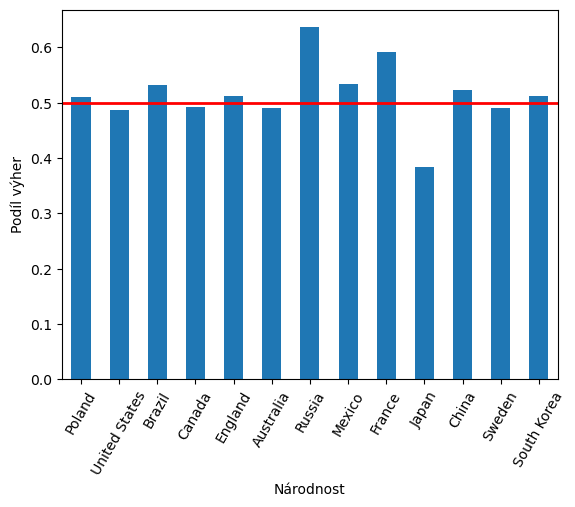

In [38]:
nations_record["Win Percentage"].plot(kind='bar')
plt.xlabel('Národnost')
plt.ylabel('Podíl výher')
#plt.title('Win percentage of each Nation')
plt.xticks(rotation = 60)
plt.axhline(y=0.5, color='r', linestyle='-', linewidth=2)
plt.show()

From this graph we can see that most nations have a success rate around the 50% mark. There are few outliers with Russia success rate about 63%, France right under 60% and Japan about 38%. 

We have to note that there is a big difference between number of fights each nation has with United States 7743 and Brazil 2127. Other 11 countries are between 582 and 127.

For the number of Brazillian fighters, we have to state that their success rate is impressive as well.

#### Who is more likely to win a title fight?

In [39]:
df_win[["Title A", "Title B"]].value_counts().reset_index()

,Title A,Title B,count
0,Champion,Challenger,174
1,Challenger,Champion,76
2,Vacant,Vacant,51
3,Champion,Interim Champion,9
4,Interim Champion,Champion,7
5,Interim Champion,Challenger,4
6,Challenger,Interim Champion,1


In [40]:
sizes = [183, 83]
labels = ['Výhry šampiona', 'Prohry šampiona']

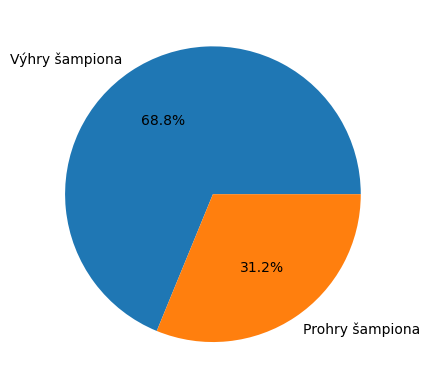

In [41]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('')
plt.show()

Champions won 183 fights and only lost 83 fights having 68.8% success rate in title fights.

#### Is there a benefit in missing scheduled weight? 

There is a rumor in the MMA community that missing weight, helps fighters win, because they can be heavier in the fight. MMA organizations aknowledge this advantage by charging the fighter part of his purse if he misses weight.

But there is also a possibility, that fighters who dont manage to make weight might be negatively affected by some other factors or the weight cut itself.

To determine whether a fighter missed weight, we need to differentiate between title, non title fights and "catchweight" fights. In title and catchweight fights there is no tolerance, in normal fights there is 1 pound tolerance.

In [42]:
df_win[["Weightclass", "Weight A", "Weight B", "Title A", "Title B"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7157 entries, 0 to 7293
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weightclass  7157 non-null   float64
 1   Weight A     7157 non-null   float64
 2   Weight B     7157 non-null   float64
 3   Title A      322 non-null    object 
 4   Title B      322 non-null    object 
dtypes: float64(3), object(2)
memory usage: 335.5+ KB


These are standard MMA categories (115, 125, 135, 145, 155, 170, 185, 205, 265), all the others are catchweight. 

In [43]:
df_win["Weightclass"].value_counts()

Weightclass
155.0    1235
170.0    1225
185.0     944
135.0     814
145.0     727
205.0     650
265.0     614
125.0     529
115.0     288
140.0      18
160.0      10
150.0       8
158.0       7
195.0       7
138.0       6
180.0       5
130.0       4
148.0       4
174.0       3
175.0       3
127.0       3
190.0       3
149.0       3
165.0       3
215.0       3
136.0       2
120.0       2
129.0       2
139.0       2
128.0       2
172.0       2
176.0       2
157.0       2
141.0       2
177.0       2
159.0       2
146.0       1
211.0       1
220.0       1
197.0       1
208.0       1
189.0       1
187.0       1
183.0       1
123.0       1
143.0       1
142.0       1
163.0       1
186.0       1
137.0       1
188.0       1
147.0       1
156.0       1
118.0       1
173.0       1
Name: count, dtype: int64

We create new column "Tolerance" and fill it with corresponding values.

In [44]:
df_win.loc[~df_win["Weightclass"].isin([115, 125, 135, 145, 155, 170, 185, 205, 265]), "Tolerance"] = 0
df_win.loc[df_win["Weightclass"].isin([115, 125, 135, 145, 155, 170, 185, 205, 265]), "Tolerance"] = 1
df_win.loc[~df_win["Title A"].isnull(), "Tolerance"] = 0
df_win.loc[~df_win["Title B"].isnull(), "Tolerance"] = 0
df_win.head()

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\1187809057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win.loc[~df_win["Weightclass"].isin([115, 125, 135, 145, 155, 170, 185, 205, 265]), "Tolerance"] = 0


,Fighter A,Fighter B,Result,Weightclass,Rounds,Venue,Date,Location,Billing,Event Name,Referee,Description,Method,Finish,Odds A,Title A,Weight A,Age A,Height A,Reach A,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,UFC win A,UFC loss A,UFC draws A,Nationality A,Nick A,Odds cat A,Odds B,Title B,Weight B,Age B,Height B,Reach B,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,UFC win B,UFC loss B,UFC draws B,Nationality B,Nick B,Odds cat B,Height Diff,Reach Diff,Age Diff,Height Comparison,Reach Comparison,Age Comparison,Tolerance
0,Marcin Tybura,Tai Tuivasa,win,265.0,5,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Event,UFC Fight Night: Tuivasa vs. Tybura,Herb Dean,Rear Naked Choke,Submission,1,-105,NaN,247.0,38,191.0,198.0,9,5,6,0,9,3,0,11,7,0,Poland,Tybur,Near Even,-115,NaN,265.5,31,188.0,191.0,13,3,0,2,1,1,0,8,6,0,Australia,Bam Bam,Near Even,3.0,7.0,7,Větší,Větší,Větší,1.0
2,Ovince St. Preux,Kennedy Nzechukwu,win,205.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Mark Smith,Split,Decision,0,500,NaN,206.0,40,191.0,203.0,12,5,8,3,6,9,0,14,12,0,United States,OSP,Heavy Underdog,-700,NaN,205.0,31,196.0,211.0,8,2,1,1,3,1,0,6,4,0,United States,American Savage,Huge Favorite,-5.0,-8.0,9,Menší,Menší,Větší,1.0
3,Christian Rodriguez,Isaac Dulgarian,win,145.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Chris Tognoni,Split,Decision,0,165,NaN,145.0,26,170.0,180.0,3,0,4,0,3,1,0,3,1,0,United States,CeeRod,Slight Underdog,-200,NaN,145.5,27,170.0,180.0,4,0,2,0,0,0,0,1,0,0,United States,The MidWest Choppa,Moderate Favorite,0.0,0.0,-1,Stejné,Stejné,Menší,1.0
4,Macy Chiasson,Pannie Kianzad,win,135.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Mark Smith,Rear Naked Choke,Submission,1,-230,NaN,135.5,32,180.0,183.0,2,1,2,1,4,1,0,6,3,0,United States,NaN,Moderate Favorite,190,NaN,136.0,32,170.0,168.0,3,1,0,2,13,4,0,5,4,0,Sweden,Banzai,Slight Underdog,10.0,15.0,0,Větší,Větší,Stejné,1.0
5,Gerald Meerschaert,Bryan Barberena,win,185.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Herb Dean,Rear Naked Choke,Submission,2,-250,NaN,185.5,36,185.0,197.0,6,4,27,8,2,5,0,10,9,0,United States,GM3,Moderate Favorite,200,NaN,186.0,34,183.0,183.0,11,2,2,3,5,6,0,9,9,0,United States,Bam Bam,Moderate Underdog,2.0,14.0,2,Větší,Větší,Větší,1.0


In [45]:
df_win["Tolerance"].value_counts()

Tolerance
1.0    6704
0.0     453
Name: count, dtype: int64

In [46]:
df_win["Weight Miss A"] = ((df_win["Weightclass"] + df_win["Tolerance"]) < df_win["Weight A"])
df_win["Weight Miss B"] = ((df_win["Weightclass"] + df_win["Tolerance"]) < df_win["Weight B"])

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\379662204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win["Weight Miss A"] = ((df_win["Weightclass"] + df_win["Tolerance"]) < df_win["Weight A"])
C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\379662204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win["Weight Miss B"] = ((df_win["Weightclass"] + df_win["Tolerance"]) < df_win["Weight B"])


In [47]:
df_win.iloc[20:50]

,Fighter A,Fighter B,Result,Weightclass,Rounds,Venue,Date,Location,Billing,Event Name,Referee,Description,Method,Finish,Odds A,Title A,Weight A,Age A,Height A,Reach A,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,UFC win A,UFC loss A,UFC draws A,Nationality A,Nick A,Odds cat A,Odds B,Title B,Weight B,Age B,Height B,Reach B,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,UFC win B,UFC loss B,UFC draws B,Nationality B,Nick B,Odds cat B,Height Diff,Reach Diff,Age Diff,Height Comparison,Reach Comparison,Age Comparison,Tolerance,Weight Miss A,Weight Miss B
21,Kyler Phillips,Pedro Munhoz,win,135.0,3,Kaseya Center,2024-03-09,"Miami, Florida, United States",Prelim,UFC 299: O'Malley vs. Vera 2,Keith Peterson,Unanimous,Decision,0,-220,NaN,135.0,28,173.0,183.0,5,0,2,0,4,2,0,5,1,0,United States,Matrix,Moderate Favorite,180,NaN,135.0,37,168.0,165.0,5,0,8,0,7,8,0,10,8,0,Brazil,The Young Punisher,Slight Underdog,5.0,18.0,-9,Větší,Větší,Menší,1.0,False,False
22,Philipe Lins,Ion Cutelaba,win,205.0,3,Kaseya Center,2024-03-09,"Miami, Florida, United States",Prelim,UFC 299: O'Malley vs. Vera 2,Mike Beltran,Unanimous,Decision,0,120,NaN,206.0,38,188.0,198.0,9,4,4,0,4,1,0,3,2,0,Brazil,Monstro,Near Even,-140,NaN,205.0,30,185.0,191.0,13,4,2,4,2,1,1,6,8,1,Moldova,The Hulk,Slight Favorite,3.0,7.0,8,Větší,Větší,Větší,1.0,False,False
23,Michel Pereira,Michał Oleksiejczuk,win,185.0,3,Kaseya Center,2024-03-09,"Miami, Florida, United States",Prelim,UFC 299: O'Malley vs. Vera 2,Dan Miragliotta,Rear Naked Choke,Submission,1,-150,NaN,186.0,30,186.0,185.0,11,2,7,1,11,8,0,7,2,0,Brazil,Demolidor,Slight Favorite,125,NaN,185.0,29,184.0,188.0,14,1,1,4,4,1,0,7,4,0,Poland,Hussar,Slight Underdog,2.0,-3.0,1,Větší,Menší,Větší,1.0,False,False
24,Robelis Despaigne,Josh Parisian,win,265.0,3,Kaseya Center,2024-03-09,"Miami, Florida, United States",Prelim,UFC 299: O'Malley vs. Vera 2,Andrew Glenn,Counter Right,KO/TKO,1,-400,NaN,261.0,35,201.0,221.0,4,0,0,0,0,0,0,0,0,0,Cuba,The Bad Boy,Heavy Favorite,310,NaN,266.0,34,193.0,201.0,11,2,2,2,2,3,0,2,4,0,United States,NaN,Moderate Underdog,8.0,20.0,1,Větší,Větší,Větší,1.0,False,False
25,Asu Almabaev,CJ Vergara,win,125.0,3,Kaseya Center,2024-03-09,"Miami, Florida, United States",Prelim,UFC 299: O'Malley vs. Vera 2,Keith Peterson,Unanimous,Decision,0,-600,NaN,126.0,30,163.0,165.0,3,1,9,0,6,1,0,1,0,0,Kazakhstan,Zulfikhar,Huge Favorite,425,NaN,127.0,32,168.0,173.0,7,0,0,2,5,2,1,3,2,0,United States,NaN,Heavy Underdog,-5.0,-8.0,-2,Menší,Menší,Menší,1.0,False,True
26,Joanne Wood,Maryna Moroz,win,125.0,3,Kaseya Center,2024-03-09,"Miami, Florida, United States",Prelim,UFC 299: O'Malley vs. Vera 2,Mike Beltran,Split,Decision,0,180,NaN,125.0,38,168.0,166.0,5,0,1,5,10,3,0,8,8,0,Scotland,JoJo,Slight Underdog,-225,NaN,126.0,32,170.0,170.0,1,0,6,1,4,4,0,6,5,0,Ukraine,The Iron Lady,Moderate Favorite,-2.0,-4.0,6,Menší,Menší,Větší,1.0,False,False
27,Jairzinho Rozenstruik,Shamil Gaziev,win,265.0,5,UFC Apex,2024-03-02,"Las Vegas, Nevada, United States",Main Event,UFC Fight Night: Rozenstruik vs. Gaziev,Marc Goddard,Retirement,KO/TKO,4,150,NaN,257.0,35,188.0,198.0,12,2,0,1,1,2,0,7,5,0,Suriname,Bigi Boy,Slight Underdog,-175,NaN,261.0,34,193.0,199.0,8,0,3,0,1,0,0,1,0,0,Bahrain,NaN,Slight Favorite,-5.0,-1.0,1,Menší,Menší,Větší,1.0,False,False
28,Vitor Petrino,Tyson Pedro,win,205.0,3,UFC Apex,2024-03-02,"Las Vegas, Nevada, United States",Co-Main,UFC Fight Night: Rozenstruik vs. Gaziev,Mark Smith,Unanimous,Decision,0,-325,NaN,205.5,26,188.0,197.0,7,0,1,0,2,0,0,3,0,0,Brazil,Icao / Merciless / Cabuloso,Moderate Favorite,250,NaN,205.5,32,191.0,201.0,5,1,5,1,0,2,0,6,4,0,Australia,NaN,Moderate Underdog,-3.0,-4.0,-6,Menší,Menší,Menší,1.0,False,False
29,Muhammad Mokaev,Alex Perez,win,125.0,3,UFC Apex,2024-03-02,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Rozenstruik vs. Gaziev,Keith Peterson,Unanimous,Decision,0,-350,NaN,126.0,23,170.0,178.0,2,0,6,0,3,0,0,5,0,0,England,The Punisher,Moderate Favorite,280,

In [48]:
df_win.groupby(["Weight Miss A", "Weight Miss B"])["Result"].count().reset_index()

,Weight Miss A,Weight Miss B,Result
0,False,False,6883
1,False,True,149
2,True,False,118
3,True,True,7


We can see that there are 149 cases where fighter that didnt make weight lost and 118 cases where fighter that didnt make weight won. 

There is also 7 cases where both fighters didnt make weight.

This indicates that fighters who miss weight are more likely to lose the fight. This might be caused by some underlying illness or the weight cut difficulties themselves.

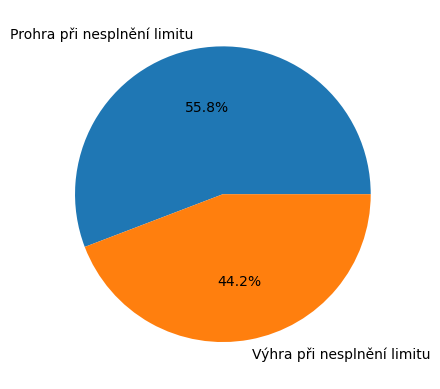

In [49]:
sizes = [149, 118]
labels = ['Prohra při nesplnění limitu', 'Výhra při nesplnění limitu']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('')
plt.show()

### 3. How do past results of fighters affect result?

In [50]:
df_win['Win Comparison'] = np.where(df_win['UFC win A'] > df_win['UFC win B'], 'Více', 
                             np.where(df_win['UFC win A'] < df_win['UFC win B'], 'Méně', 'Stejně'))
df_win['Loss Comparison'] = np.where(df_win['UFC loss A'] > df_win['UFC loss B'], 'Více', 
                             np.where(df_win['UFC loss A'] < df_win['UFC loss B'], 'Méně', 'Stejně'))
df_win['Draw Comparison'] = np.where(df_win['UFC draws A'] > df_win['UFC draws B'], 'Více', 
                             np.where(df_win['UFC draws A'] < df_win['UFC draws B'], 'Méně', 'Stejně'))

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\1898408006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win['Win Comparison'] = np.where(df_win['UFC win A'] > df_win['UFC win B'], 'Více',
C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\1898408006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win['Loss Comparison'] = np.where(df_win['UFC loss A'] > df_win['UFC loss B'], 'Více',
C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\1898408006.py:5: SettingWithCopyWarning: 
A value 

In [51]:
df_comp = df_win.groupby(["Win Comparison", 'Loss Comparison'])["Result"].count().reset_index().sort_values("Result", ascending=False)
df_comp

,Win Comparison,Loss Comparison,Result
8,Více,Více,1929
0,Méně,Méně,1826
4,Stejně,Stejně,760
7,Více,Stejně,657
3,Stejně,Méně,471
6,Více,Méně,427
1,Méně,Stejně,414
5,Stejně,Více,387
2,Méně,Více,286


In [52]:
# Create a pivot table to prepare the data for heatmap and fill missing values with 0
pivot_table = df_comp.pivot_table(index="Win Comparison", columns="Loss Comparison", values="Result", fill_value=0)
pivot_table2 = df_comp.pivot_table(index="Win Comparison", columns="Loss Comparison", values="Result")

In [53]:
# Iterate through every column in the pivot table
for column_name, series in pivot_table.items():
    # Iterate through every index-value pair in the columns Series
    for index, cell_value in series.items():
        # Perform operations with each cell value
        if (cell_value + pivot_table.loc[column_name, index]) != 0:
            pivot_table2.loc[index, column_name] = cell_value / (cell_value + pivot_table.loc[column_name, index])
        else:
            pivot_table2.loc[index, column_name] = 0

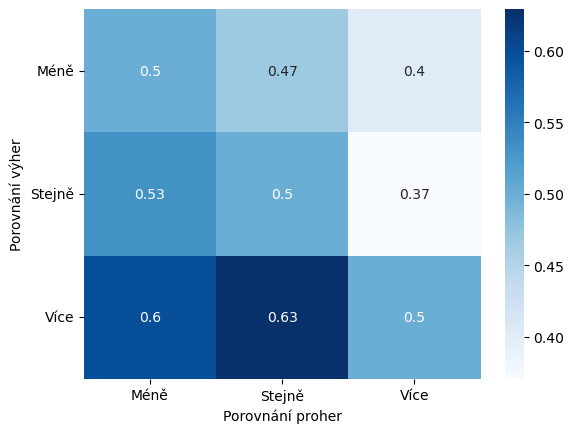

In [54]:
sns.heatmap(data=pivot_table2, cmap="Blues", annot=True)
plt.ylabel('Porovnání výher')
plt.xlabel('Porovnání proher')
#plt.title('Win percentage for each combination')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

From the heatmap above we can see that:
1. The fighter who has Even number of wins and Less losses as his opponent, is likely to win in 53% of fights.
2. The fighter who has More number of wins and Even losses as his opponent, is likely to win in 63% of fights.
3. The fighter who has More number of wins and Less losses as his opponent, is likely to win in 60% of fights.

We can see that number of wins vs number of losses have an impact on the result of a match.

We would expect that the results of points 2. and 3. would be different, because Less number of losses should be better than Even number of losses. This could be caused by the fact that some losses (up to a certain point) mean more experience. 


### 4. How did odds predict the fight?

In [55]:
df_win['Prediction'] = np.where(df_win['Odds A'] > df_win['Odds B'], 'Underdog', 
                             np.where(df_win['Odds A'] < df_win['Odds B'], 'Favorite', 'Even'))

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\3337512597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win['Prediction'] = np.where(df_win['Odds A'] > df_win['Odds B'], 'Underdog',


In [56]:
df_pred = df_win.groupby(["Prediction"])["Result"].count().reset_index()
df_pred = df_pred.sort_values("Result", ascending=False)

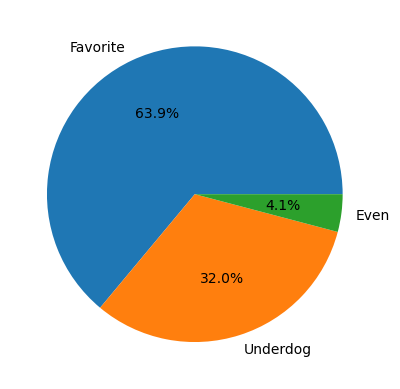

In [57]:
plt.pie(df_pred['Result'], labels=df_pred['Prediction'], autopct='%1.1f%%')
plt.title('')
plt.show()

We can see that in 63.9% fights the Favorite won and in 32% of fights the Underdog won. There were few cases of even Odds as well.

We can go deeper and use odds categories we got from tapology scraping.

In [58]:
df_cats = df_win.groupby(["Odds cat A", "Odds cat B"])["Result"].count().reset_index()
df_cats

,Odds cat A,Odds cat B,Result
0,Even,Even,166
1,Heavy Favorite,Heavy Underdog,124
2,Heavy Favorite,Moderate Underdog,437
3,Heavy Underdog,Heavy Favorite,24
4,Heavy Underdog,Huge Favorite,32
5,Huge Favorite,Heavy Underdog,220
6,Huge Favorite,Huge Underdog,100
7,Huge Underdog,Huge Favorite,12
8,Moderate Favorite,Even,1
9,Moderate Favorite,Huge Underdog,1


We have to create pivot table to plot a heatmap.

In [59]:
# Create a pivot table to prepare the data for heatmap and fill missing values with 0
pivot_table = df_cats.pivot_table(index="Odds cat A", columns="Odds cat B", values="Result", fill_value=0)
pivot_table2 = df_cats.pivot_table(index="Odds cat A", columns="Odds cat B", values="Result")

This piece of code fills the second pivot table with percentages calculated from the first table.

In [60]:
# Iterate through every column in the pivot table
for column_name, series in pivot_table.items():
    # Iterate through every index-value pair in the columns Series
    for index, cell_value in series.items():
        # Perform operations with each cell value
        if (cell_value + pivot_table.loc[column_name, index]) != 0:
            pivot_table2.loc[index, column_name] = cell_value / (cell_value + pivot_table.loc[column_name, index])
        else:
            pivot_table2.loc[index, column_name] = 0

In [61]:
pivot_table2

Odds cat B,Even,Heavy Favorite,Heavy Underdog,Huge Favorite,Huge Underdog,Moderate Favorite,Moderate Underdog,Near Even,Slight Favorite,Slight Underdog
Odds cat A,,,,,,,,,,
Even,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Heavy Favorite,0.0,0.000000,0.837838,0.000000,0.000000,0.000000,0.846899,0.000000,0.000000,0.000000
Heavy Underdog,0.0,0.162162,0.000000,0.126984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Huge Favorite,0.0,0.000000,0.873016,0.000000,0.892857,0.000000,0.000000,0.000000,0.000000,0.000000
Huge Underdog,0.0,0.000000,0.000000,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Moderate Favorite,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.739230,0.000000,0.000000,0.659656
Moderate Underdog,0.0,0.153101,0.000000,0.000000,0.000000,0.260770,0.000000,0.000000,0.000000,0.000000
Near Even,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.472527,0.000000
Slight Favorite,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.527473,0.500000,0.596429


In [62]:
pivot_table

Odds cat B,Even,Heavy Favorite,Heavy Underdog,Huge Favorite,Huge Underdog,Moderate Favorite,Moderate Underdog,Near Even,Slight Favorite,Slight Underdog
Odds cat A,,,,,,,,,,
Even,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heavy Favorite,0.0,0.0,124.0,0.0,0.0,0.0,437.0,0.0,0.0,0.0
Heavy Underdog,0.0,24.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0
Huge Favorite,0.0,0.0,220.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
Huge Underdog,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
Moderate Favorite,1.0,0.0,0.0,0.0,1.0,0.0,1287.0,0.0,0.0,690.0
Moderate Underdog,0.0,79.0,0.0,0.0,0.0,454.0,0.0,0.0,0.0,0.0
Near Even,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490.0,473.0,0.0
Slight Favorite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,528.0,2.0,1002.0


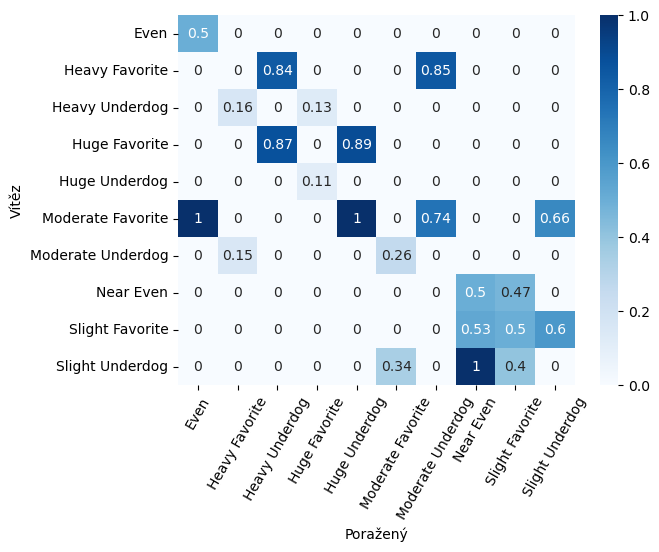

In [63]:
sns.heatmap(data=pivot_table2, cmap="Blues", annot=True)
plt.xlabel('Poražený')
plt.ylabel('Vítěz')
#plt.title('Win percentage for each category')
plt.xticks(rotation=60)
plt.show()

From the heatmap we can see one very interesting insights.

1. "Heavy Favourite" wins less percentage of matches against "Heavy Underdog", than against "Moderate Underdog" which shouldnt be the case if odds were done correctly.
2. There are three values of 100% winrate. In all three cases it is cause by only one record, therefore it is not interesting.
3. All the other values make sense and are predicted correctly.

### 5. Do external conditions like referee, arena, weight category or rounds affect how the fight ends?

In [64]:
df = ufc_data
df.shape

(7294, 52)

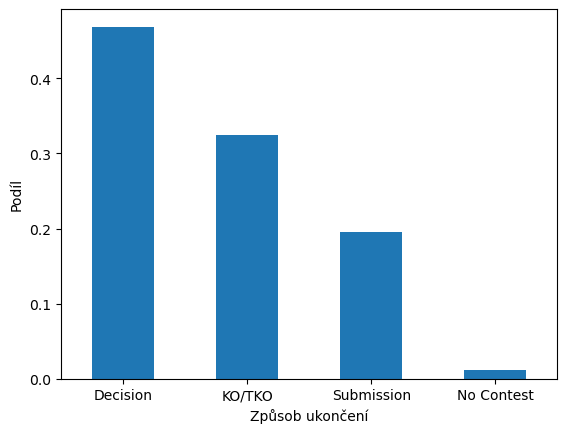

In [65]:
method_perc = df["Method"].value_counts(normalize=True)
method_perc.plot(kind='bar')
plt.xlabel('Způsob ukončení')
plt.ylabel('Podíl')
#plt.title('Barplot of Method Percentage')
plt.xticks(rotation=0)
plt.show()

In [66]:
method_perc.reset_index()

,Method,proportion
0,Decision,0.468604
1,KO/TKO,0.324787
2,Submission,0.195092
3,No Contest,0.011516


We can see that approx. 47% of fights end by decision, 32% by KO/TKO, 20% by submission and 1% by No Contest.

Lets check if other characteristics have impact on this.

#### Referee effect on a method of finish.

First we select only referees with over 100 fights judged.

In [67]:
ref_count = df.groupby(["Referee"])["Result"].count().reset_index()
ref_count = ref_count[ref_count["Result"] >= 100]
ref_count.sort_values("Result", ascending=False)

,Referee,Result
66,Herb Dean,1092
32,Dan Miragliotta,462
125,Marc Goddard,456
91,John McCarthy,430
131,Mario Yamasaki,370
137,Mark Smith,370
29,Chris Tognoni,355
105,Keith Peterson,338
73,Jason Herzog,329
208,Yves Lavigne,265


We have selected 15 referees for further inspection.

In [68]:
ref_df = df[df["Referee"].isin(ref_count["Referee"])]
ref_df.shape

(5195, 52)

Top 15 referees judged 5195 fights out of 7294 in our dataset.

Now we perform the analysis.

We count the results by "Referee" and "Method".

In [69]:
ref_method = ref_df.groupby(["Referee", "Method"])["Result"].count().reset_index()
ref_method

,Referee,Method,Result
0,Chris Tognoni,Decision,172
1,Chris Tognoni,KO/TKO,103
2,Chris Tognoni,No Contest,7
3,Chris Tognoni,Submission,73
4,Dan Miragliotta,Decision,193
5,Dan Miragliotta,KO/TKO,177
6,Dan Miragliotta,No Contest,5
7,Dan Miragliotta,Submission,87
8,Herb Dean,Decision,475
9,Herb Dean,KO/TKO,380


Lets create a pivot table and display it on a heatmap.

In [70]:
# Create a pivot table to prepare the data for heatmap and fill missing values with 0
pivot_table = ref_method.pivot_table(index="Referee", columns="Method", values="Result", fill_value=0)
pivot_table

Method,Decision,KO/TKO,No Contest,Submission
Referee,,,,
Chris Tognoni,172.0,103.0,7.0,73.0
Dan Miragliotta,193.0,177.0,5.0,87.0
Herb Dean,475.0,380.0,12.0,225.0
Jason Herzog,157.0,106.0,4.0,62.0
John McCarthy,174.0,155.0,10.0,91.0
Josh Rosenthal,60.0,33.0,2.0,26.0
Keith Peterson,175.0,108.0,4.0,51.0
Kevin MacDonald,46.0,30.0,2.0,22.0
Leon Roberts,100.0,60.0,0.0,26.0


We calculate the percentage of methods for each Referee

In [71]:
pivot_table_perc = pivot_table.div(pivot_table.sum(axis=1), axis=0)
pivot_table_perc

Method,Decision,KO/TKO,No Contest,Submission
Referee,,,,
Chris Tognoni,0.484507,0.290141,0.019718,0.205634
Dan Miragliotta,0.417749,0.383117,0.010823,0.188312
Herb Dean,0.434982,0.347985,0.010989,0.206044
Jason Herzog,0.477204,0.322188,0.012158,0.188450
John McCarthy,0.404651,0.360465,0.023256,0.211628
Josh Rosenthal,0.495868,0.272727,0.016529,0.214876
Keith Peterson,0.517751,0.319527,0.011834,0.150888
Kevin MacDonald,0.460000,0.300000,0.020000,0.220000
Leon Roberts,0.537634,0.322581,0.000000,0.139785


In [72]:
method_perc

Method
Decision      0.468604
KO/TKO        0.324787
Submission    0.195092
No Contest    0.011516
Name: proportion, dtype: float64

In [79]:
# Define the numbers to subtract from each column
# Subtract each column by different numbers
for method, value in method_perc.items():
    if method in pivot_table_perc.columns:
        pivot_table_perc[method] = pivot_table_perc[method].sub(value)

In [80]:
pivot_table_perc

Method,Decision,KO/TKO,No Contest,Submission
Referee,,,,
Chris Tognoni,-0.452702,-0.359434,-0.003314,-0.184550
Dan Miragliotta,-0.519460,-0.266458,-0.012210,-0.201872
Herb Dean,-0.502227,-0.301590,-0.012044,-0.184140
Jason Herzog,-0.460005,-0.327387,-0.010875,-0.201734
John McCarthy,-0.532558,-0.289110,0.000223,-0.178556
Josh Rosenthal,-0.441341,-0.376848,-0.006504,-0.175308
Keith Peterson,-0.419457,-0.330048,-0.011198,-0.239296
Kevin MacDonald,-0.477209,-0.349575,-0.003033,-0.170184
Leon Roberts,-0.399574,-0.326994,-0.023033,-0.250399


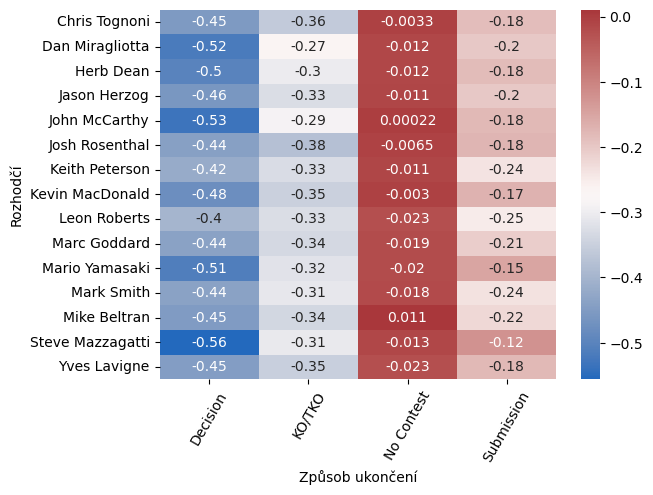

In [81]:
sns.heatmap(data=pivot_table_perc, cmap="vlag", annot=True)
plt.xlabel('Způsob ukončení')
plt.ylabel('Rozhodčí')
#plt.title('Method distribution for each Referee')
plt.xticks(rotation=60)
plt.show()

From the heatmap above, we can see that:
1. Dan Miragliotta has about 5.8% positive difference in KO/TKO finishes, which could mean he stops the fights more than he should.
2. John McCarthy has about 3.6% positive difference in KO/TKO finishes, which could mean he stops the fights more than he should.
3. Jack Rosenthal has about 5.2% negative difference in KO/TKO finishes, which could mean he stops the fights less than he should.
4. Chris Tognoni has about 3.5% negative difference in KO/TKO finishes, which could mean he stops the fights less than he should.
5. Jason Herzog shows the least deviation from the overall data, which could mean that he determines whether the fight should be stopped the best.
6. Mike Beltran has 2.2% positive difference in No Contest finishes, which in absolute numbers is almost triple, than what the norm is for the entire dataset.


Referee plays a role in mainly in KO/TKO finishes, because it is often up to him to determine, if the fighter is capable of defending himself or not. 

In Submission finishes, it is on the fighters themselves to stop the fight.

#### Venue effect on a method of finish.

Here we are mainly interested to find out how does one particular venue affect the method a fight ends.

After Covid hit, the UFC started making some events in a small training arena called the UFC Apex. The octagon itself in this arena is smaller, and there is just about a hundred fans watching the fight (most of them are friends and family of the fighters).


In [82]:
pd.set_option('display.max_rows', None)
df["Venue"].value_counts()

Venue
UFC APEX                                     764
MGM Grand Garden Arena                       453
T-Mobile Arena                               333
UFC Apex                                     316
Mandalay Bay Events Center                   292
UFC Fight Island                             109
Toyota Center                                108
Prudential Center                             90
Honda Center                                  89
Madison Square Garden                         87
TD Garden                                     84
02 Arena                                      82
Bell Centre                                   81
United Center                                 81
American Airlines Center                      76
Etihad Arena                                  74
O2 Arena                                      72
HSBC Arena                                    71
VyStar Veterans Memorial Arena                70
The Pearl at the Palms Casino Resort          65
Singapore Indo

In [83]:
pd.set_option('display.max_rows', 50)

First we need to split the data based on Venue UFC Apex. In our dataset it is represented by values "UFC APEX" and "UFC Apex".

In [84]:
venue_apex = df[df["Venue"].isin(["UFC Apex", "UFC APEX"])]
venue_other = df[~df["Venue"].isin(["UFC Apex", "UFC APEX"])]

In [85]:
venue_apex.shape

(1080, 52)

In [86]:
venue_other.shape

(6214, 52)

We can see that there is a lot more other arenas than UFC Apex. To be fair we select only the fights that happened after the first event in UFC Apex, since there could be a difference in fight finished in the early stages of UFC.

In [87]:
venue_apex["Date"].min()

'2020-05-30'

we can see that first fight in UFC Apex happened in 2020-05-30, so we filter non apex fights based on this date.

In [88]:
venue_other = venue_other[venue_other["Date"] > venue_apex["Date"].min()]

In [89]:
venue_other.shape

(901, 52)

We can see that there have been more UFC Apex fights (1080) after the introduction of it than fights in other arenas (901).

In [90]:
venue_apex_perc = venue_apex["Method"].value_counts(normalize=True)
venue_other_perc = venue_other["Method"].value_counts(normalize=True)

In [91]:
print(method_perc, venue_apex_perc, venue_other_perc)

Method
Decision      0.468604
KO/TKO        0.324787
Submission    0.195092
No Contest    0.011516
Name: proportion, dtype: float64 Method
Decision      0.472222
KO/TKO        0.330556
Submission    0.179630
No Contest    0.017593
Name: proportion, dtype: float64 Method
Decision      0.496115
KO/TKO        0.312986
Submission    0.180910
No Contest    0.009989
Name: proportion, dtype: float64


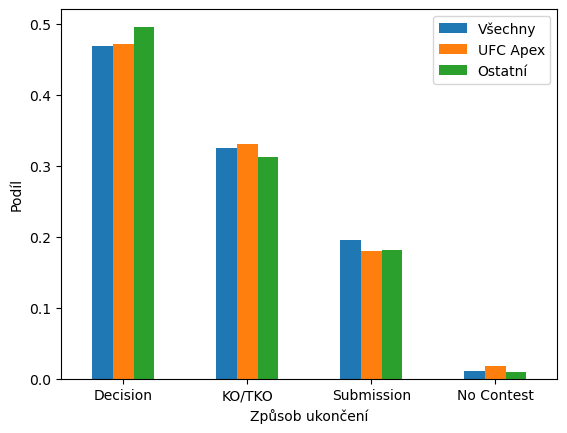

In [92]:
data = {
    "Všechny": method_perc.values,
    "UFC Apex": venue_apex_perc.values,
    "Ostatní": venue_other_perc.values
}
venue_method = pd.DataFrame(data)
venue_method.index = ["Decision", "KO/TKO", "Submission", "No Contest"]
venue_method.plot(kind='bar')
plt.ylabel('Podíl')
plt.xlabel('Způsob ukončení')
#plt.title('Difference in Method of finishes based on Venue')
plt.xticks(rotation = 0)
plt.show()

1. We can see that about 2.5% more fights end on Decision in Venues other than UPC Apex. 
2. We can also see there is almost double the amount of No Contest fights in the UFC Apex than in other Venues as well as in the whole dataset.

This could be due to the smaller fighting space forcing fighters to engage more.

#### Rounds effect on method of finish.

In [93]:
three_rounds = ufc_data[ufc_data["Rounds"] == 3]
five_rounds = ufc_data[ufc_data["Rounds"] == 5]

In [94]:
print(three_rounds.shape, five_rounds.shape)

(6634, 52) (660, 52)


In [95]:
three_perc = three_rounds["Method"].value_counts(normalize=True)
five_perc = five_rounds["Method"].value_counts(normalize=True)
print(three_perc, five_perc)

Method
Decision      0.477691
KO/TKO        0.312029
Submission    0.198523
No Contest    0.011758
Name: proportion, dtype: float64 Method
KO/TKO        0.453030
Decision      0.377273
Submission    0.160606
No Contest    0.009091
Name: proportion, dtype: float64


We switch the order of five_perc series to fit the graph.

In [96]:
five_perc[0], five_perc[1] = five_perc[1], five_perc[0]

C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\2323708547.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  five_perc[0], five_perc[1] = five_perc[1], five_perc[0]
C:\Users\Uživatel\AppData\Local\Temp\ipykernel_18540\2323708547.py:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  five_perc[0], five_perc[1] = five_perc[1], five_perc[0]


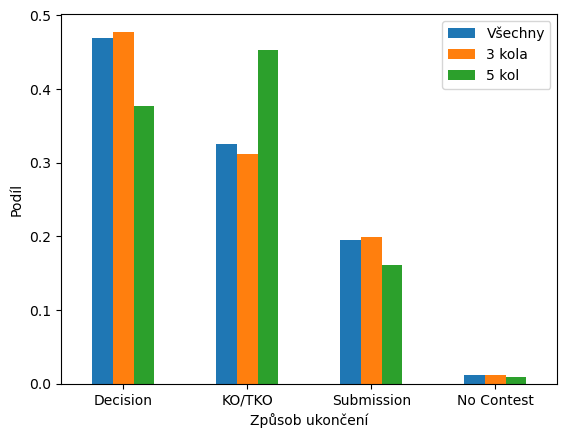

In [97]:
data = {
    "Všechny": method_perc,
    "3 kola": three_perc.values,
    "5 kol": five_perc.values
}
venue_method = pd.DataFrame(data)
venue_method.index = ["Decision", "KO/TKO", "Submission", "No Contest"]
venue_method.plot(kind='bar')
plt.xlabel('Způsob ukončení')
plt.ylabel('Podíl')
#plt.title('Difference in Method of finishes based on Venue')
plt.xticks(rotation = 0)
plt.show()

We can see that five round fights end by KO/TKO in 45% of cases, by Decision in 38% of cases and by submission in 16% of cases. 

Theres a big difference in KO/TKO and Decision finishes between five and three rounds fights.

#### Weightclass effect on a method of finish.

There are 9 main weightclasses in our dataset (115, 125, 135, 145, 155, 170, 185, 205, 265), we only select them. This way we filter out all of the catchweight fights.

In [98]:
df_weight = df[df["Weightclass"].isin([115, 125, 135, 145, 155, 170, 185, 205, 265])]

In [99]:
df_weight["Weightclass"].value_counts()

Weightclass
155.0    1260
170.0    1243
185.0     957
135.0     838
145.0     743
205.0     668
265.0     626
125.0     537
115.0     290
Name: count, dtype: int64

In [100]:
weight_method = df_weight.groupby(["Weightclass", "Method"])["Result"].count().reset_index()
weight_method.sort_values("Weightclass", inplace=True)
weight_method

,Weightclass,Method,Result
0,115.0,Decision,190
1,115.0,KO/TKO,42
2,115.0,Submission,58
3,125.0,Decision,307
4,125.0,KO/TKO,114
5,125.0,No Contest,2
6,125.0,Submission,114
7,135.0,Decision,437
8,135.0,KO/TKO,222
9,135.0,No Contest,17


In [101]:
# Create a pivot table to prepare the data for heatmap and fill missing values with 0
pivot_table = weight_method.pivot_table(index="Weightclass", columns="Method", values="Result", fill_value=0)
pivot_table

Method,Decision,KO/TKO,No Contest,Submission
Weightclass,,,,
115.0,190.0,42.0,0.0,58.0
125.0,307.0,114.0,2.0,114.0
135.0,437.0,222.0,17.0,162.0
145.0,412.0,200.0,8.0,123.0
155.0,605.0,360.0,14.0,281.0
170.0,588.0,403.0,12.0,240.0
185.0,381.0,356.0,10.0,210.0
205.0,251.0,292.0,12.0,113.0
265.0,189.0,338.0,8.0,91.0


In [102]:
pivot_table_perc = pivot_table.div(pivot_table.sum(axis=1), axis=0)
pivot_table_perc

Method,Decision,KO/TKO,No Contest,Submission
Weightclass,,,,
115.0,0.655172,0.144828,0.000000,0.200000
125.0,0.571695,0.212291,0.003724,0.212291
135.0,0.521480,0.264916,0.020286,0.193317
145.0,0.554509,0.269179,0.010767,0.165545
155.0,0.480159,0.285714,0.011111,0.223016
170.0,0.473049,0.324216,0.009654,0.193081
185.0,0.398119,0.371996,0.010449,0.219436
205.0,0.375749,0.437126,0.017964,0.169162
265.0,0.301917,0.539936,0.012780,0.145367


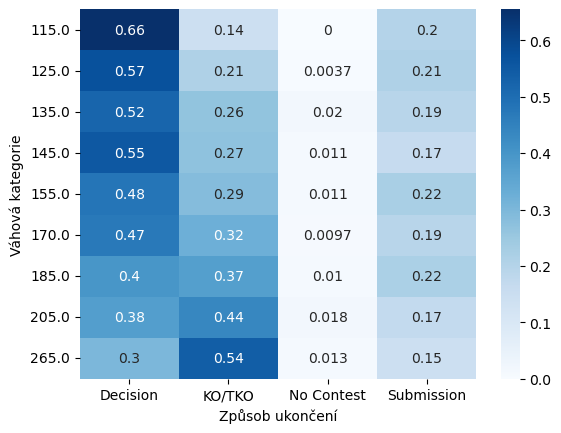

In [103]:
sns.heatmap(data=pivot_table_perc, cmap="Blues", annot=True)
plt.xlabel('Způsob ukončení')
plt.ylabel('Váhová kategorie')
#plt.title('Method distribution for each Weightclass')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

We can see that the share of Decision finishes decreases as Weightclass increases.

On the other hand the share of KO/TKO finishes increases as Weightclass increases.

We dont see any significant pattern in No Contest or Submission finishes.

In [104]:
weight_sum = weight_method.groupby(["Weightclass"])["Result"].sum().reset_index()
merged_df = pd.merge(weight_method, weight_sum, on='Weightclass')
merged_df['Result Percentage'] = merged_df['Result_x'] / merged_df['Result_y']

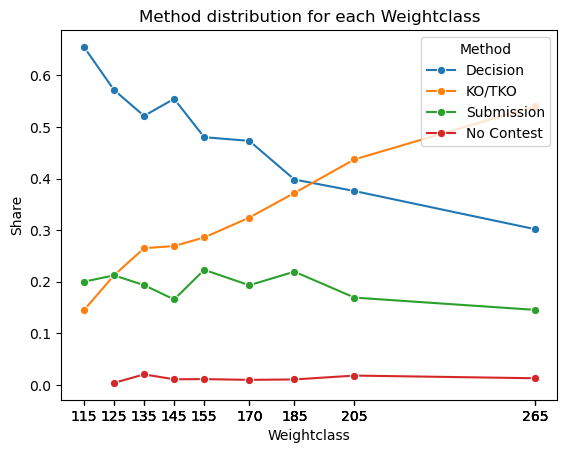

In [105]:
sns.lineplot(data=merged_df, x='Weightclass', y='Result Percentage', hue='Method',marker='o')
plt.ylabel('Share')
plt.xlabel('Weightclass')
plt.title('Method distribution for each Weightclass')
plt.xticks(merged_df['Weightclass'], rotation=0)
plt.yticks(rotation=0)
plt.show()

We can see that share of KO/TKO finishes surpases share of Submission finishes in the 135 Weightclass and share of Decision finishes in the 205 Weightclass.

### 6. Did distribution of methods change over time?

In [106]:
df = ufc_data

First we need to extract years from the Date.

In [107]:
year = []
def get_year():
    for date in df["Date"]:
        year.append(date.split("-")[0])
    return year
get_year()
df['Year'] = year
df.head()

,Fighter A,Fighter B,Result,Weightclass,Rounds,Venue,Date,Location,Billing,Event Name,Referee,Description,Method,Finish,Odds A,Title A,Weight A,Age A,Height A,Reach A,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,UFC win A,UFC loss A,UFC draws A,Nationality A,Nick A,Odds cat A,Odds B,Title B,Weight B,Age B,Height B,Reach B,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,UFC win B,UFC loss B,UFC draws B,Nationality B,Nick B,Odds cat B,Year
0,Marcin Tybura,Tai Tuivasa,win,265.0,5,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Event,UFC Fight Night: Tuivasa vs. Tybura,Herb Dean,Rear Naked Choke,Submission,1,-105,NaN,247.0,38,191.0,198.0,9,5,6,0,9,3,0,11,7,0,Poland,Tybur,Near Even,-115,NaN,265.5,31,188.0,191.0,13,3,0,2,1,1,0,8,6,0,Australia,Bam Bam,Near Even,2024
1,Bryan Battle,Ange Loosa,NC,170.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Co-Main,UFC Fight Night: Tuivasa vs. Tybura,Mike Beltran,Accidental Eye Poke,No Contest,0,-180,NaN,170.0,29,185.0,196.0,3,0,5,1,2,1,0,5,1,0,United States,The Butcher,Slight Favorite,150,NaN,171.0,29,178.0,188.0,5,0,1,0,4,3,0,2,1,0,"Congo, The Democratic Republic of the",The Last Ninja,Slight Underdog,2024
2,Ovince St. Preux,Kennedy Nzechukwu,win,205.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Mark Smith,Split,Decision,0,500,NaN,206.0,40,191.0,203.0,12,5,8,3,6,9,0,14,12,0,United States,OSP,Heavy Underdog,-700,NaN,205.0,31,196.0,211.0,8,2,1,1,3,1,0,6,4,0,United States,American Savage,Huge Favorite,2024
3,Christian Rodriguez,Isaac Dulgarian,win,145.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Chris Tognoni,Split,Decision,0,165,NaN,145.0,26,170.0,180.0,3,0,4,0,3,1,0,3,1,0,United States,CeeRod,Slight Underdog,-200,NaN,145.5,27,170.0,180.0,4,0,2,0,0,0,0,1,0,0,United States,The MidWest Choppa,Moderate Favorite,2024
4,Macy Chiasson,Pannie Kianzad,win,135.0,3,UFC Apex,2024-03-16,"Las Vegas, Nevada, United States",Main Card,UFC Fight Night: Tuivasa vs. Tybura,Mark Smith,Rear Naked Choke,Submission,1,-230,NaN,135.5,32,180.0,183.0,2,1,2,1,4,1,0,6,3,0,United States,NaN,Moderate Favorite,190,NaN,136.0,32,170.0,168.0,3,1,0,2,13,4,0,5,4,0,Sweden,Banzai,Slight Underdog,2024


Now we count the number of methods for each year.

In [108]:
year_method = df.groupby(["Method", "Year"])["Result"].count().reset_index()
year_method

,Method,Year,Result
0,Decision,2001,10
1,Decision,2002,15
2,Decision,2003,14
3,Decision,2004,10
4,Decision,2005,19
...,...,...,...
85,Submission,2020,81
86,Submission,2021,73
87,Submission,2022,98
88,Submission,2023,102


In [109]:
year_sum = year_method.groupby(["Year"])["Result"].sum().reset_index()
year_sum

,Year,Result
0,2001,32
1,2002,53
2,2003,41
3,2004,39
4,2005,80
5,2006,158
6,2007,171
7,2008,201
8,2009,215
9,2010,253


In [110]:
merged_df = pd.merge(year_method, year_sum, on='Year')
merged_df['Result Percentage'] = merged_df['Result_x'] / merged_df['Result_y']

In [111]:
merged_df

,Method,Year,Result_x,Result_y,Result Percentage
0,Decision,2001,10,32,0.312500
1,KO/TKO,2001,15,32,0.468750
2,Submission,2001,7,32,0.218750
3,Decision,2002,15,53,0.283019
4,KO/TKO,2002,27,53,0.509434
...,...,...,...,...,...
85,Submission,2023,102,520,0.196154
86,Decision,2024,57,112,0.508929
87,KO/TKO,2024,33,112,0.294643
88,No Contest,2024,3,112,0.026786


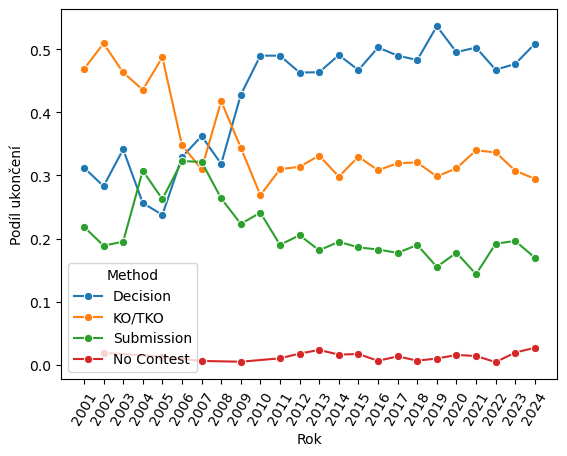

In [136]:
sns.lineplot(data=merged_df, x='Year', y='Result Percentage', hue='Method',marker='o')
plt.ylabel('Podíl ukončení')
plt.xlabel('Rok')
#plt.title('Method distribution for each Year')
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.show()

We can see that the distribution of methods changed dramatically between the years 2003 and 2011. 
1. In 2001 the most prevelant finish method was KO/TKO with about 48%, followed by Decision with about 30% and Submission about 22%.
2. In 2004 there is a big spike in Submissions reaching about 30% and a decline of Decisions falling to 25%.
3. In 2006 all the major finishing methods have the same share of about 33%. 
4. From 2007 to 2011 Submissions were on a decline, finally settling slightly under 20% level.
5. In 2008 KO/TKO finish had a big spike reaching 40% level, but falling down in the next few years to settle around 30%.
6. Decision wins were on a rise from 2005 all the way to 2010  with a slight dip in 2008.

Since 2011 the methods stabilized with Decisions around 50%, KO/TKOs around 30% and Submissions around 20%.

### 7. Is there a correlation between previous results and finishing method of a fight? 

We will do this analysis only on fights with a winner.

In [113]:
df_win = ufc_data[ufc_data["Result"] == "win"]

First we need to convert Methods into their encoded version.

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
label_encoder = LabelEncoder()

In [116]:
df_encoded = pd.get_dummies(df_win, columns=['Method'], prefix='Encoded')

In [117]:
df_encoded.columns

Index(['Fighter A', 'Fighter B', 'Result', 'Weightclass', 'Rounds', 'Venue',
       'Date', 'Location', 'Billing', 'Event Name', 'Referee', 'Description',
       'Finish', 'Odds A', 'Title A', 'Weight A', 'Age A', 'Height A',
       'Reach A', 'KO win A', 'KO loss A', 'Sub win A', 'Sub loss A',
       'Dec win A', 'Dec loss A', 'Draws A', 'UFC win A', 'UFC loss A',
       'UFC draws A', 'Nationality A', 'Nick A', 'Odds cat A', 'Odds B',
       'Title B', 'Weight B', 'Age B', 'Height B', 'Reach B', 'KO win B',
       'KO loss B', 'Sub win B', 'Sub loss B', 'Dec win B', 'Dec loss B',
       'Draws B', 'UFC win B', 'UFC loss B', 'UFC draws B', 'Nationality B',
       'Nick B', 'Odds cat B', 'Year', 'Encoded_Decision', 'Encoded_KO/TKO',
       'Encoded_Submission'],
      dtype='object')

In [137]:
cor = df_encoded[['KO win A', 'KO loss A', 'Sub win A', 'Sub loss A', 'Dec win A', 'Dec loss A', 'Draws A', 'KO win B', 'KO loss B', 'Sub win B', 'Sub loss B', 'Dec win B',
       'Dec loss B', 'Draws B', 'Encoded_Decision',
       'Encoded_KO/TKO', 'Encoded_Submission']].corr()
cor

,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,Encoded_Decision,Encoded_KO/TKO,Encoded_Submission
KO win A,1.000000,0.357326,-0.058692,0.305344,0.154424,0.208008,0.091529,0.259703,0.166711,0.039813,0.029448,0.077184,0.079710,0.011846,-0.059153,0.188443,-0.148209
KO loss A,0.357326,1.000000,0.285979,0.142908,0.140411,0.189631,0.044840,0.143510,0.141903,0.039789,0.026459,0.008174,0.041331,0.028510,-0.047797,0.039404,0.013312
Sub win A,-0.058692,0.285979,1.000000,0.217044,0.083280,0.321397,0.187241,0.023855,0.025723,0.107947,0.059862,0.070571,0.058723,0.060180,-0.066453,-0.118090,0.222334
Sub loss A,0.305344,0.142908,0.217044,1.000000,0.200461,0.185871,0.102801,0.050258,0.054998,0.045157,0.051372,0.016218,0.070263,0.032378,-0.018486,0.031531,-0.014059
Dec win A,0.154424,0.140411,0.083280,0.200461,1.000000,0.419903,0.117091,0.103963,0.021091,0.083851,0.044414,0.225180,0.157381,0.033386,0.158611,-0.080804,-0.103078
Dec loss A,0.208008,0.189631,0.321397,0.185871,0.419903,1.000000,0.235695,0.065399,0.048421,0.053483,0.061911,0.090717,0.112822,0.032276,0.034385,-0.034635,-0.002164
Draws A,0.091529,0.044840,0.187241,0.102801,0.117091,0.235695,1.000000,-0.005173,-0.001400,0.012644,0.015504,-0.004175,0.015676,0.020899,-0.001913,-0.016133,0.021413
KO win B,0.259703,0.143510,0.023855,0.050258,0.103963,0.065399,-0.005173,1.000000,0.385613,-0.043594,0.302524,0.185158,0.267597,0.081314,-0.065118,0.071214,-0.002533
KO loss B,0.166711,0.141903,0.025723,0.054998,0.021091,0.048421,-0.001400,0.385613,1.000000,0.279101,0.156535,0.159288,0.183154,0.096357,-0.093785,0.140642,-0.048541
Sub win B,0.039813,0.039789,0.107947,0.045157,0.083851,0.053483,0.012644,-0.043594,0.279101,1.000000,0.243043,0.106456,0.303271,0.216574,0.017471,0.017105,-0.042015


In [140]:
cor[["Encoded_Decision", "Encoded_KO/TKO", "Encoded_Submission"]]

,Encoded_Decision,Encoded_KO/TKO,Encoded_Submission
KO win A,-0.059153,0.188443,-0.148209
KO loss A,-0.047797,0.039404,0.013312
Sub win A,-0.066453,-0.118090,0.222334
Sub loss A,-0.018486,0.031531,-0.014059
Dec win A,0.158611,-0.080804,-0.103078
Dec loss A,0.034385,-0.034635,-0.002164
Draws A,-0.001913,-0.016133,0.021413
KO win B,-0.065118,0.071214,-0.002533
KO loss B,-0.093785,0.140642,-0.048541
Sub win B,0.017471,0.017105,-0.042015


From the correlation table we can see that there are some variables that correlate with Methods of finish more than others. Althought the correlation coefficients are weak, they are bigger than correlation coefficients in the rest of the data.
1. The highest corr. coefs. in the Decision column are "Dec win A" (0.16) , "Dec loss B" (0.13) and "Dec win B" (0.1). This means that for method Decision there is strongest relationship with decision wins of both fighters and decision losses of losing fighter.
2. The highest corr. coefs. in the KO/TKO column are "KO win A" (0.19) and "KO loss B" (0.14). This means that for method KO/TKO there is strongest relationship with KO wins of winning fighter and KO losses of losing fighter.
3. The highest corr. coefs. in the Submission column are "Sub win A" (0.22), "KO win A" (-0.15), "Dec win A" (-0.1). This means that for method Submission there is strongest relationship with Submission, KO and Decision wins of winning fighter.

It is interesting that KO/TKO and Decision columns have at least some relationship (over 0.1) with both winning and losing fighters variables, but Submission column has relationship only with the winning fighter variables.

### 8. What is most likely round a fight ends prematurely?

In [141]:
df = ufc_data

In [142]:
finish_perc = df["Finish"].value_counts(normalize=True)

In [143]:
finish_perc

Finish
0    0.480121
1    0.266246
2    0.163833
3    0.079929
4    0.005758
5    0.004113
Name: proportion, dtype: float64

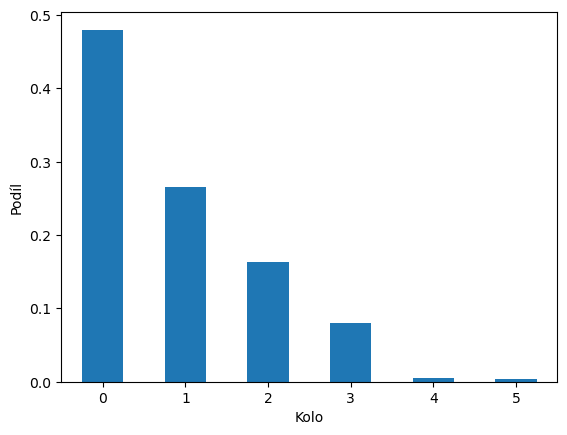

In [169]:
finish_perc.plot(kind='bar')
plt.xlabel('Kolo')
plt.ylabel('Podíl')
#plt.title('Barplot of Finish proportion')
plt.xticks(rotation=0)
plt.show()

In [145]:
three_rounds = df[df["Rounds"] == 3]
five_rounds = df[df["Rounds"] == 5]

In [146]:
finish_three_perc = three_rounds["Finish"].value_counts(normalize=True)
finish_five_perc = five_rounds["Finish"].value_counts(normalize=True)

In [147]:
finish_three_perc

Finish
0    0.489448
1    0.269219
2    0.164154
3    0.077178
Name: proportion, dtype: float64

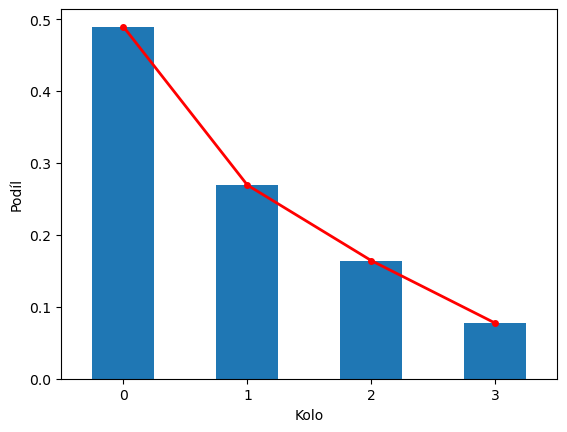

In [170]:
finish_three_perc.plot(kind='bar')
finish_three_perc.plot( color='red', marker='.', linestyle='-', linewidth=2, markersize=8, label='Line Plot')
plt.xlabel('Kolo')
plt.ylabel('Podíl')
#plt.title('Barplot of Finish proportion for three round fights')
plt.xticks(rotation=0)
plt.show()

In [149]:
finish_five_perc

Finish
0    0.386364
1    0.236364
2    0.160606
3    0.107576
4    0.063636
5    0.045455
Name: proportion, dtype: float64

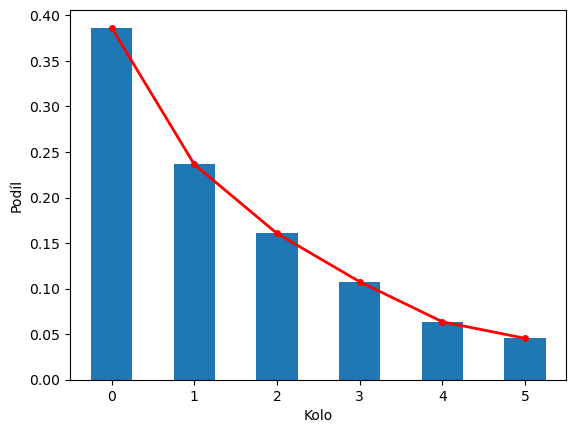

In [171]:
finish_five_perc.plot(kind='bar')
finish_five_perc.plot(color='red', marker='.', linestyle='-', linewidth=2, markersize=8, label='Line Plot')
plt.xlabel('Kolo')
plt.ylabel('Podíl')
#plt.title('Barplot of Finish proportion for five round fights')
plt.xticks(rotation=0)
plt.show()

In [129]:
print(finish_perc, finish_three_perc, finish_five_perc)

Finish
0    0.480121
1    0.266246
2    0.163833
3    0.079929
4    0.005758
5    0.004113
Name: proportion, dtype: float64 Finish
0    0.489448
1    0.269219
2    0.164154
3    0.077178
Name: proportion, dtype: float64 Finish
0    0.386364
1    0.236364
2    0.160606
3    0.107576
4    0.063636
5    0.045455
Name: proportion, dtype: float64


In both five and three round fights, the likelihood of fight ending decreases round by round.

It is interesting that the chance a fight ends in third round is bigger in five round fights. 

### 9. Is there any predictor for a draw? 

In [161]:
df_draw = ufc_data[ufc_data["Result"] == "draw"]
df_draw.shape

(53, 53)

In [162]:
df_draw["Rounds"].value_counts()

Rounds
3    46
5     7
Name: count, dtype: int64

There is not enough data to do any effective analysis for draws.

#### Unfinished work

In draws results, fighters A and B are interchangeable, so we copy the values from fighter A to fighter B and opposite.

In [164]:
df_draw.columns

Index(['Fighter A', 'Fighter B', 'Result', 'Weightclass', 'Rounds', 'Venue',
       'Date', 'Location', 'Billing', 'Event Name', 'Referee', 'Description',
       'Method', 'Finish', 'Odds A', 'Title A', 'Weight A', 'Age A',
       'Height A', 'Reach A', 'KO win A', 'KO loss A', 'Sub win A',
       'Sub loss A', 'Dec win A', 'Dec loss A', 'Draws A', 'UFC win A',
       'UFC loss A', 'UFC draws A', 'Nationality A', 'Nick A', 'Odds cat A',
       'Odds B', 'Title B', 'Weight B', 'Age B', 'Height B', 'Reach B',
       'KO win B', 'KO loss B', 'Sub win B', 'Sub loss B', 'Dec win B',
       'Dec loss B', 'Draws B', 'UFC win B', 'UFC loss B', 'UFC draws B',
       'Nationality B', 'Nick B', 'Odds cat B', 'Year'],
      dtype='object')

Make a copy of draw dataframe and change the column names to be opposite for fighter A and B.

In [156]:
df_copy = df_draw.copy()

In [165]:
df_copy.columns=['Fighter B', 'Fighter A', 'Result', 'Weightclass', 'Rounds', 'Venue',
       'Date', 'Location', 'Billing', 'Event Name', 'Referee', 'Description',
       'Method', 'Finish', 'Odds B', 'Title B', 'Weight B', 'Age B',
       'Height B', 'Reach B', 'KO win B', 'KO loss B', 'Sub win B',
       'Sub loss B', 'Dec win B', 'Dec loss B', 'Draws B', 'UFC win B',
       'UFC loss B', 'UFC draws B', 'Nationality B', 'Nick B', 'Odds cat B',
       'Odds A', 'Title A', 'Weight A', 'Age A', 'Height A', 'Reach A',
       'KO win A', 'KO loss A', 'Sub win A', 'Sub loss A', 'Dec win A',
       'Dec loss A', 'Draws A', 'UFC win A', 'UFC loss A', 'UFC draws A',
       'Nationality A', 'Nick A', 'Odds cat A', "Year"]

In [166]:
df_copy.head()

,Fighter B,Fighter A,Result,Weightclass,Rounds,Venue,Date,Location,Billing,Event Name,Referee,Description,Method,Finish,Odds B,Title B,Weight B,Age B,Height B,Reach B,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,UFC win B,UFC loss B,UFC draws B,Nationality B,Nick B,Odds cat B,Odds A,Title A,Weight A,Age A,Height A,Reach A,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,UFC win A,UFC loss A,UFC draws A,Nationality A,Nick A,Odds cat A,Year
169,Nazim Sadykhov,Viacheslav Borshchev,draw,155.0,3,Madison Square Garden,2023-11-11,"New York City, New York, United States",Prelim,UFC 295: Procházka vs. Pereira,Keith Peterson,Majority,Decision,0,-135,NaN,155.6,29,178.0,175.0,6,0,2,1,1,0,0,2,0,0,Azerbaijan,Black Wolf,Slight Favorite,115,NaN,154.8,31,180.0,175.0,6,0,0,0,1,3,0,2,2,0,United States,Slava,Near Even,2023
179,Elizeu Zaleski,Rinat Fakhretdinov,draw,170.0,3,Ibirapuera Gymnasium,2023-11-04,"Sao Paulo, Brazil",Prelim,UFC Fight Night: Almeida vs. Lewis,Fernando Portella,Majority,Decision,0,280,NaN,171.0,36,180.0,185.0,14,1,3,2,7,4,0,10,3,0,Brazil,Capoeira,Moderate Underdog,-370,NaN,170.5,32,183.0,188.0,11,0,6,0,4,1,0,3,0,0,Russia,Gladiator,Moderate Favorite,2023
229,Alexa Grasso,Valentina Shevchenko,draw,125.0,5,T-Mobile Arena,2023-09-16,"Las Vegas, Nevada, United States",Main Event,UFC Fight Night: Grasso vs. Shevchenko 2,Herb Dean,Split,Decision,0,145,Champion,124.5,30,165.0,168.0,4,0,2,1,10,2,0,8,3,0,Mexico,NaN,Slight Underdog,-175,Challenger,124.5,35,165.0,166.0,8,1,7,1,8,2,0,12,3,0,Kyrgyzstan,Bullet,Slight Favorite,2023
532,Jai Herbert,Ľudovít Klein,draw,155.0,3,O2 Arena,2023-03-18,"London, England",Prelim,UFC 286: Edwards vs. Usman 3,Rich Mitchell,Majority,Decision,0,170,NaN,156.0,34,185.0,196.0,9,3,1,1,2,0,0,2,3,0,England,The Black Country Banger,Slight Underdog,-210,NaN,156.0,28,170.0,184.0,8,1,8,2,3,1,0,3,2,0,Slovakia,Mr. Highlight,Moderate Favorite,2023
586,Jimmy Crute,Alonzo Menifield,draw,205.0,3,RAC Arena,2023-02-11,"Perth, Western Australia",Main Card,UFC 284: Makhachev vs. Volkanovski,Marc Goddard,Majority,Decision,0,-190,NaN,204.5,26,188.0,188.0,5,2,4,1,3,0,0,4,3,0,Australia,The Brute,Slight Favorite,155,NaN,205.0,35,183.0,193.0,10,1,2,0,1,2,0,6,3,0,United States,Atomic,Slight Underdog,2023


In [167]:
df_draw.head()

,Fighter A,Fighter B,Result,Weightclass,Rounds,Venue,Date,Location,Billing,Event Name,Referee,Description,Method,Finish,Odds A,Title A,Weight A,Age A,Height A,Reach A,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,UFC win A,UFC loss A,UFC draws A,Nationality A,Nick A,Odds cat A,Odds B,Title B,Weight B,Age B,Height B,Reach B,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,UFC win B,UFC loss B,UFC draws B,Nationality B,Nick B,Odds cat B,Year
169,Nazim Sadykhov,Viacheslav Borshchev,draw,155.0,3,Madison Square Garden,2023-11-11,"New York City, New York, United States",Prelim,UFC 295: Procházka vs. Pereira,Keith Peterson,Majority,Decision,0,-135,NaN,155.6,29,178.0,175.0,6,0,2,1,1,0,0,2,0,0,Azerbaijan,Black Wolf,Slight Favorite,115,NaN,154.8,31,180.0,175.0,6,0,0,0,1,3,0,2,2,0,United States,Slava,Near Even,2023
179,Elizeu Zaleski,Rinat Fakhretdinov,draw,170.0,3,Ibirapuera Gymnasium,2023-11-04,"Sao Paulo, Brazil",Prelim,UFC Fight Night: Almeida vs. Lewis,Fernando Portella,Majority,Decision,0,280,NaN,171.0,36,180.0,185.0,14,1,3,2,7,4,0,10,3,0,Brazil,Capoeira,Moderate Underdog,-370,NaN,170.5,32,183.0,188.0,11,0,6,0,4,1,0,3,0,0,Russia,Gladiator,Moderate Favorite,2023
229,Alexa Grasso,Valentina Shevchenko,draw,125.0,5,T-Mobile Arena,2023-09-16,"Las Vegas, Nevada, United States",Main Event,UFC Fight Night: Grasso vs. Shevchenko 2,Herb Dean,Split,Decision,0,145,Champion,124.5,30,165.0,168.0,4,0,2,1,10,2,0,8,3,0,Mexico,NaN,Slight Underdog,-175,Challenger,124.5,35,165.0,166.0,8,1,7,1,8,2,0,12,3,0,Kyrgyzstan,Bullet,Slight Favorite,2023
532,Jai Herbert,Ľudovít Klein,draw,155.0,3,O2 Arena,2023-03-18,"London, England",Prelim,UFC 286: Edwards vs. Usman 3,Rich Mitchell,Majority,Decision,0,170,NaN,156.0,34,185.0,196.0,9,3,1,1,2,0,0,2,3,0,England,The Black Country Banger,Slight Underdog,-210,NaN,156.0,28,170.0,184.0,8,1,8,2,3,1,0,3,2,0,Slovakia,Mr. Highlight,Moderate Favorite,2023
586,Jimmy Crute,Alonzo Menifield,draw,205.0,3,RAC Arena,2023-02-11,"Perth, Western Australia",Main Card,UFC 284: Makhachev vs. Volkanovski,Marc Goddard,Majority,Decision,0,-190,NaN,204.5,26,188.0,188.0,5,2,4,1,3,0,0,4,3,0,Australia,The Brute,Slight Favorite,155,NaN,205.0,35,183.0,193.0,10,1,2,0,1,2,0,6,3,0,United States,Atomic,Slight Underdog,2023


Combine the original and flipped dataframes.

In [168]:
df_combined = pd.concat([df_draw, df_copy], ignore_index=True)
df_combined.head()

,Fighter A,Fighter B,Result,Weightclass,Rounds,Venue,Date,Location,Billing,Event Name,Referee,Description,Method,Finish,Odds A,Title A,Weight A,Age A,Height A,Reach A,KO win A,KO loss A,Sub win A,Sub loss A,Dec win A,Dec loss A,Draws A,UFC win A,UFC loss A,UFC draws A,Nationality A,Nick A,Odds cat A,Odds B,Title B,Weight B,Age B,Height B,Reach B,KO win B,KO loss B,Sub win B,Sub loss B,Dec win B,Dec loss B,Draws B,UFC win B,UFC loss B,UFC draws B,Nationality B,Nick B,Odds cat B,Year
0,Nazim Sadykhov,Viacheslav Borshchev,draw,155.0,3,Madison Square Garden,2023-11-11,"New York City, New York, United States",Prelim,UFC 295: Procházka vs. Pereira,Keith Peterson,Majority,Decision,0,-135,NaN,155.6,29,178.0,175.0,6,0,2,1,1,0,0,2,0,0,Azerbaijan,Black Wolf,Slight Favorite,115,NaN,154.8,31,180.0,175.0,6,0,0,0,1,3,0,2,2,0,United States,Slava,Near Even,2023
1,Elizeu Zaleski,Rinat Fakhretdinov,draw,170.0,3,Ibirapuera Gymnasium,2023-11-04,"Sao Paulo, Brazil",Prelim,UFC Fight Night: Almeida vs. Lewis,Fernando Portella,Majority,Decision,0,280,NaN,171.0,36,180.0,185.0,14,1,3,2,7,4,0,10,3,0,Brazil,Capoeira,Moderate Underdog,-370,NaN,170.5,32,183.0,188.0,11,0,6,0,4,1,0,3,0,0,Russia,Gladiator,Moderate Favorite,2023
2,Alexa Grasso,Valentina Shevchenko,draw,125.0,5,T-Mobile Arena,2023-09-16,"Las Vegas, Nevada, United States",Main Event,UFC Fight Night: Grasso vs. Shevchenko 2,Herb Dean,Split,Decision,0,145,Champion,124.5,30,165.0,168.0,4,0,2,1,10,2,0,8,3,0,Mexico,NaN,Slight Underdog,-175,Challenger,124.5,35,165.0,166.0,8,1,7,1,8,2,0,12,3,0,Kyrgyzstan,Bullet,Slight Favorite,2023
3,Jai Herbert,Ľudovít Klein,draw,155.0,3,O2 Arena,2023-03-18,"London, England",Prelim,UFC 286: Edwards vs. Usman 3,Rich Mitchell,Majority,Decision,0,170,NaN,156.0,34,185.0,196.0,9,3,1,1,2,0,0,2,3,0,England,The Black Country Banger,Slight Underdog,-210,NaN,156.0,28,170.0,184.0,8,1,8,2,3,1,0,3,2,0,Slovakia,Mr. Highlight,Moderate Favorite,2023
4,Jimmy Crute,Alonzo Menifield,draw,205.0,3,RAC Arena,2023-02-11,"Perth, Western Australia",Main Card,UFC 284: Makhachev vs. Volkanovski,Marc Goddard,Majority,Decision,0,-190,NaN,204.5,26,188.0,188.0,5,2,4,1,3,0,0,4,3,0,Australia,The Brute,Slight Favorite,155,NaN,205.0,35,183.0,193.0,10,1,2,0,1,2,0,6,3,0,United States,Atomic,Slight Underdog,2023
